# Models with Airbnb data: Find other features for success?

Continuing on from our last notebook, we dwelve deeper into what could assist us in defining success. Within this notebook, we create several models with specific features that would predict "success" within hostings, and follow up by trying to find other characteristics through feature importance.

In [28]:
import pandas as pd
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [29]:
listings = pd.read_csv('airbnb/detailed_listings.csv')
listings

id                            listing_url     scrape_id  \
0         5570      https://www.airbnb.com/rooms/5570  2.020000e+13   
1        29967     https://www.airbnb.com/rooms/29967  2.020000e+13   
2        38245     https://www.airbnb.com/rooms/38245  2.020000e+13   
3        54001     https://www.airbnb.com/rooms/54001  2.020000e+13   
4        62274     https://www.airbnb.com/rooms/62274  2.020000e+13   
...        ...                                    ...           ...   
9094  51025904  https://www.airbnb.com/rooms/51025904  2.020000e+13   
9095  51027262  https://www.airbnb.com/rooms/51027262  2.020000e+13   
9096  51033701  https://www.airbnb.com/rooms/51033701  2.020000e+13   
9097  51034402  https://www.airbnb.com/rooms/51034402  2.020000e+13   
9098  51036524  https://www.airbnb.com/rooms/51036524  2.020000e+13   

     last_scraped                                               name  \
0       7/14/2021                      Ocean front condo on the sand   
1       7/14/2021                   Great home, 10 min walk to Beach   
2       7/15/2021                         Point Loma: Den downstairs   
3       7/15/2021       La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.   
4       7/15/2021                 charming, colorful, close to beach   
...           ...                                                ...   
9094    7/14/2021             Studio Space only steps from the beach   
9095    7/14/2021   Studio with Private Entrance next to Balboa Park   
9096    7/15/2021   Professionally maintained apt | 2BR in San Diego   
9097    7/14/2021       Live + Work + Stay + Easy | 1BR in San Diego   
9098    7/15/2021  High Rise Penthouse-Near Padres Petco Park- Ea...   

                                            description  \
0     Missionbeachretreat.   Great Ocean Front Condo...   
1     This 2 bedroom, 2 full bathroom home offers al...   
2     Stay in a 1928 Spanish Style home.  Den is dow...   
3     Separate charming cottage behind main home, 2 ...   
4     Modern, cozy, artsy, and european in a lush ga...   
...                                                 ...   
9094  This is a small studio in the heart of mission...   
9095                                                NaN   
9096  Stay for 31+ nights (minimum nights and rates ...   
9097  Stay for 30+ nights (minimum nights and rates ...   
9098  Gorgeous Penthouse condo located on the 11th f...   

                                  neighborhood_overview  \
0     While some may compare San Diego’s Mission Bea...   
1                                                   NaN   
2     This neighborhood is an expensive, high-end Po...   
3     Tranquility, stately trees, meditative, zen-fu...   
4     We are in walking distance to Starbucks, Trade...   
...                                                 ...   
9094                                                NaN   
9095                                                NaN   
9096                                                NaN   
9097                                                NaN   
9098                                                NaN   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/d3342744-140a...       8435   
1     https://a0.muscache.com/pictures/76103867/c9b5...     129123   
2     https://a0.muscache.com/pictures/f3073822-e493...     164137   
3     https://a0.muscache.com/pictures/47035b04-633c...     252692   
4     https://a0.muscache.com/pictures/84577734/93ca...     302986   
...                                                 ...        ...   
9094  https://a0.muscache.com/pictures/db889d15-55b1...  359922483   
9095  https://a0.muscache.com/pictures/af5bbe76-2d46...  408623755   
9096  https://a0.muscache.com/pictures/a4re/floorpla...  368944610   
9097  https://a0.muscache.com/pictures/a4re/floorpla...  359066913   
9098  https://a0.muscache.com/pictures/2913442f-0d47...   63806328   

                                   

### Logic behind 'success'

Essentially, we defined success with several different features. 

price - The listing is low cost

minimum_nights - The least amount of nights needed to be rented out. I decided 1-7 days is understandable.

last_review - The latest review should be recent (2021)

review_scores_rating - Essentially compiled reviews. I put it as, if rating is better than 4, is good.

closeness_attractions - All the close attractions. I decided if it's close to at least 50, it's a good place to be in.

In [30]:
success_cols = listings[['price', 'minimum_nights', 'last_review', 'review_scores_rating', 'closeness_attractions']]

success_cols['price'] = success_cols['price'].replace('[\$,]', '', regex=True).astype(float)
success_cols['minimum_nights'] = success_cols['minimum_nights'].astype(float)
success_cols['last_review'] = pd.to_datetime(success_cols['last_review'])
success_cols['review_scores_rating'] = success_cols['review_scores_rating'].astype(float)
success_cols['closeness_attractions'] = success_cols['closeness_attractions'].astype(float)

success_cols

price  minimum_nights last_review  review_scores_rating  \
0     2050.0             3.0         NaT                   NaN   
1      242.0             4.0  2021-06-30                  4.85   
2       74.0             1.0  2019-10-20                  4.30   
3      167.0             5.0  2021-07-11                  4.94   
4       83.0             1.0  2021-06-27                  4.77   
...      ...             ...         ...                   ...   
9094   105.0             2.0         NaT                   NaN   
9095   350.0             1.0         NaT                   NaN   
9096   274.0            31.0         NaT                   NaN   
9097   123.0            30.0         NaT                   NaN   
9098   149.0            31.0         NaT                   NaN   

      closeness_attractions  
0                     637.0  
1                     640.0  
2                     631.0  
3                     641.0  
4                     640.0  
...                     ...  
9094                  636.0  
9095                  629.0  
9096                  628.0  
9097                  628.0  
9098                  628.0  

[9099 rows x 5 columns]

We apply the logic of 'success' into our dataframe, then compile the scores for our labels.

In [31]:
success_cols['price_success'] = success_cols['price'].apply(lambda x:1 if x < 500 else 0)
success_cols['minimum_nights_success'] = success_cols['minimum_nights'].apply(lambda x:1 if x < 7 else 0)
success_cols['last_review_success'] = success_cols['last_review'].apply(lambda x:1 if x.date == 2020 else 0)
success_cols['review_success'] = success_cols['review_scores_rating'].apply(lambda x:1 if x >= 4.0 else 0)
success_cols['attractions_success'] = success_cols['closeness_attractions'].apply(lambda x:1 if x >= 50 else 0)

success_cols

price  minimum_nights last_review  review_scores_rating  \
0     2050.0             3.0         NaT                   NaN   
1      242.0             4.0  2021-06-30                  4.85   
2       74.0             1.0  2019-10-20                  4.30   
3      167.0             5.0  2021-07-11                  4.94   
4       83.0             1.0  2021-06-27                  4.77   
...      ...             ...         ...                   ...   
9094   105.0             2.0         NaT                   NaN   
9095   350.0             1.0         NaT                   NaN   
9096   274.0            31.0         NaT                   NaN   
9097   123.0            30.0         NaT                   NaN   
9098   149.0            31.0         NaT                   NaN   

      closeness_attractions  price_success  minimum_nights_success  \
0                     637.0              0                       1   
1                     640.0              1                       1   
2                     631.0              1                       1   
3                     641.0              1                       1   
4                     640.0              1                       1   
...                     ...            ...                     ...   
9094                  636.0              1                       1   
9095                  629.0              1                       1   
9096                  628.0              1                       0   
9097                  628.0              1                       0   
9098                  628.0              1                       0   

      last_review_success  review_success  attractions_success  
0                       0               0                    1  
1                       0               1                    1  
2                       0               1                    1  
3                       0               1                    1  
4                       0               1                    1  
...                   ...             ...                  ...  
9094                    0               0                    1  
9095                    0               0                    1  
9096                    0               0                    1  
9097                    0               0                    1  
9098                    0               0                    1  

[9099 rows x 10 columns]

In [32]:
success_cols['compiled_score'] = (
    success_cols['price_success'] + 
    success_cols['minimum_nights_success'] + 
    success_cols['last_review_success'] + 
    success_cols['review_success'] + 
    success_cols['attractions_success']
)

success_cols['successful'] = success_cols['compiled_score'].apply(lambda x:1 if x >3 else 0)
success_cols

price  minimum_nights last_review  review_scores_rating  \
0     2050.0             3.0         NaT                   NaN   
1      242.0             4.0  2021-06-30                  4.85   
2       74.0             1.0  2019-10-20                  4.30   
3      167.0             5.0  2021-07-11                  4.94   
4       83.0             1.0  2021-06-27                  4.77   
...      ...             ...         ...                   ...   
9094   105.0             2.0         NaT                   NaN   
9095   350.0             1.0         NaT                   NaN   
9096   274.0            31.0         NaT                   NaN   
9097   123.0            30.0         NaT                   NaN   
9098   149.0            31.0         NaT                   NaN   

      closeness_attractions  price_success  minimum_nights_success  \
0                     637.0              0                       1   
1                     640.0              1                       1   
2                     631.0              1                       1   
3                     641.0              1                       1   
4                     640.0              1                       1   
...                     ...            ...                     ...   
9094                  636.0              1                       1   
9095                  629.0              1                       1   
9096                  628.0              1                       0   
9097                  628.0              1                       0   
9098                  628.0              1                       0   

      last_review_success  review_success  attractions_success  \
0                       0               0                    1   
1                       0               1                    1   
2                       0               1                    1   
3                       0               1                    1   
4                       0               1                    1   
...                   ...             ...                  ...   
9094                    0               0                    1   
9095                    0               0                    1   
9096                    0               0                    1   
9097                    0               0                    1   
9098                    0               0                    1   

      compiled_score  successful  
0                  2           0  
1                  4           1  
2                  4           1  
3                  4           1  
4                  4           1  
...              ...         ...  
9094               3           0  
9095               3           0  
9096               2           0  
9097               2           0  
9098               2           0  

[9099 rows x 12 columns]

### Could we use this to train a model?

In [33]:
listings['successful'] = success_cols['successful']
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings

id                            listing_url     scrape_id  \
0         5570      https://www.airbnb.com/rooms/5570  2.020000e+13   
1        29967     https://www.airbnb.com/rooms/29967  2.020000e+13   
2        38245     https://www.airbnb.com/rooms/38245  2.020000e+13   
3        54001     https://www.airbnb.com/rooms/54001  2.020000e+13   
4        62274     https://www.airbnb.com/rooms/62274  2.020000e+13   
...        ...                                    ...           ...   
9094  51025904  https://www.airbnb.com/rooms/51025904  2.020000e+13   
9095  51027262  https://www.airbnb.com/rooms/51027262  2.020000e+13   
9096  51033701  https://www.airbnb.com/rooms/51033701  2.020000e+13   
9097  51034402  https://www.airbnb.com/rooms/51034402  2.020000e+13   
9098  51036524  https://www.airbnb.com/rooms/51036524  2.020000e+13   

     last_scraped                                               name  \
0       7/14/2021                      Ocean front condo on the sand   
1       7/14/2021                   Great home, 10 min walk to Beach   
2       7/15/2021                         Point Loma: Den downstairs   
3       7/15/2021       La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.   
4       7/15/2021                 charming, colorful, close to beach   
...           ...                                                ...   
9094    7/14/2021             Studio Space only steps from the beach   
9095    7/14/2021   Studio with Private Entrance next to Balboa Park   
9096    7/15/2021   Professionally maintained apt | 2BR in San Diego   
9097    7/14/2021       Live + Work + Stay + Easy | 1BR in San Diego   
9098    7/15/2021  High Rise Penthouse-Near Padres Petco Park- Ea...   

                                            description  \
0     Missionbeachretreat.   Great Ocean Front Condo...   
1     This 2 bedroom, 2 full bathroom home offers al...   
2     Stay in a 1928 Spanish Style home.  Den is dow...   
3     Separate charming cottage behind main home, 2 ...   
4     Modern, cozy, artsy, and european in a lush ga...   
...                                                 ...   
9094  This is a small studio in the heart of mission...   
9095                                                NaN   
9096  Stay for 31+ nights (minimum nights and rates ...   
9097  Stay for 30+ nights (minimum nights and rates ...   
9098  Gorgeous Penthouse condo located on the 11th f...   

                                  neighborhood_overview  \
0     While some may compare San Diego’s Mission Bea...   
1                                                   NaN   
2     This neighborhood is an expensive, high-end Po...   
3     Tranquility, stately trees, meditative, zen-fu...   
4     We are in walking distance to Starbucks, Trade...   
...                                                 ...   
9094                                                NaN   
9095                                                NaN   
9096                                                NaN   
9097                                                NaN   
9098                                                NaN   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/d3342744-140a...       8435   
1     https://a0.muscache.com/pictures/76103867/c9b5...     129123   
2     https://a0.muscache.com/pictures/f3073822-e493...     164137   
3     https://a0.muscache.com/pictures/47035b04-633c...     252692   
4     https://a0.muscache.com/pictures/84577734/93ca...     302986   
...                                                 ...        ...   
9094  https://a0.muscache.com/pictures/db889d15-55b1...  359922483   
9095  https://a0.muscache.com/pictures/af5bbe76-2d46...  408623755   
9096  https://a0.muscache.com/pictures/a4re/floorpla...  368944610   
9097  https://a0.muscache.com/pictures/a4re/floorpla...  359066913   
9098  https://a0.muscache.com/pictures/2913442f-0d47...   63806328   

                                   

https://scikit-learn.org/stable/modules/cross_validation.html

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
int_columns = listings[['successful','host_listings_count', 'host_total_listings_count', 
          'accommodates', 'beds', 'price', 
          'minimum_nights', 'maximum_nights', 'availability_365',
         'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
         'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
         'reviews_per_month', 'closeness_attractions']].fillna(0)

X = listings[['host_listings_count', 'host_total_listings_count', 
          'accommodates', 'beds', 'price', 
          'minimum_nights', 'maximum_nights', 'availability_365',
         'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
         'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
         'reviews_per_month', 'closeness_attractions']].fillna(0)
y = listings['successful']

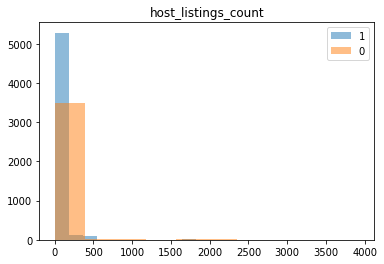

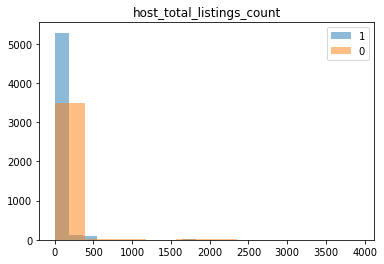

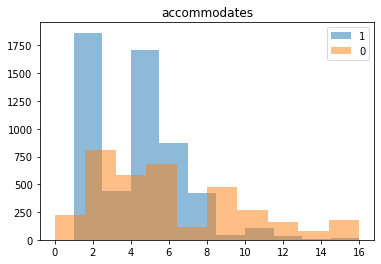

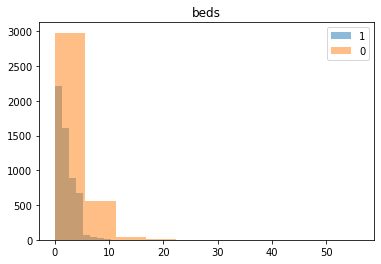

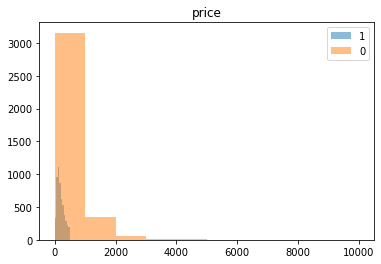

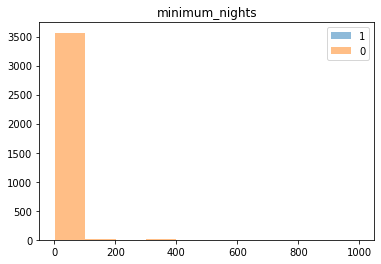

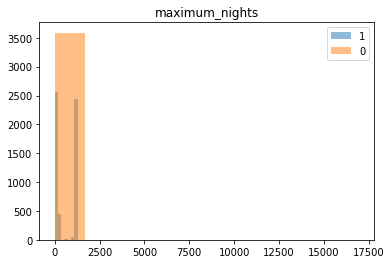

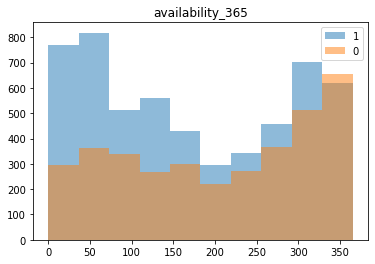

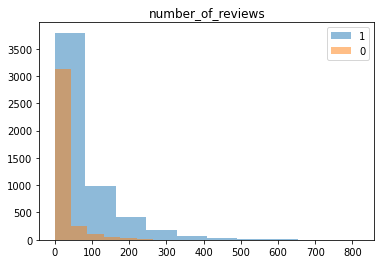

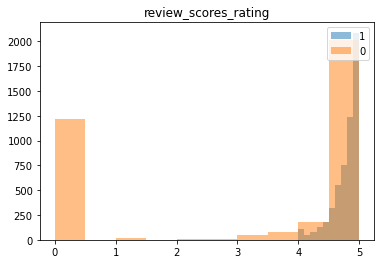

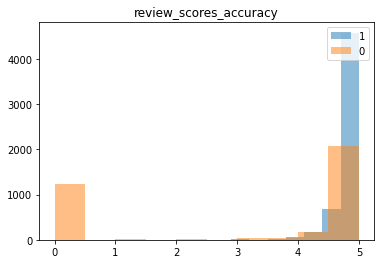

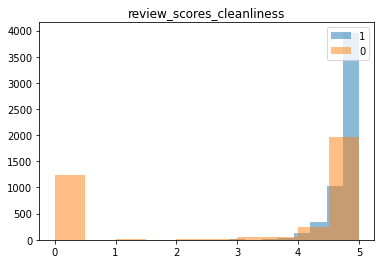

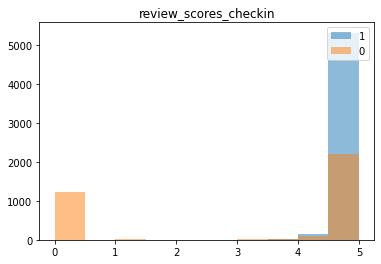

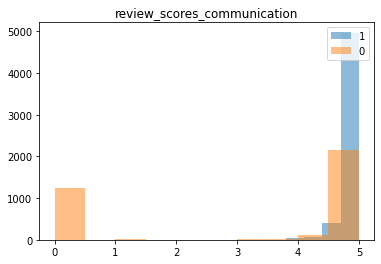

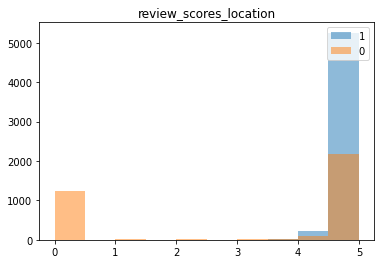

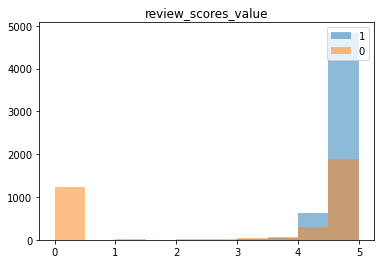

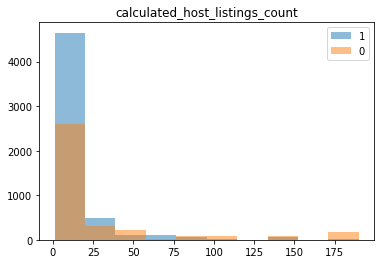

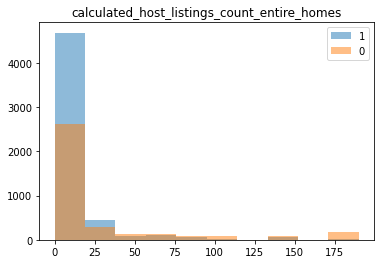

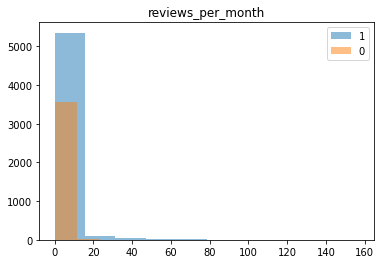

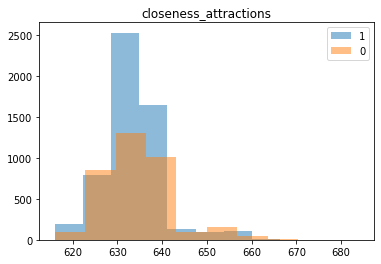

In [16]:
for col in int_columns.columns[1:]:
    plt.hist(int_columns.loc[int_columns['successful'] == 1, col], alpha=0.5, label='1')
    plt.hist(int_columns.loc[int_columns['successful'] == 0, col], alpha=0.5, label='0')
    plt.legend(loc='upper right')
    plt.title(col)
    plt.show()

In [17]:
clf = XGBClassifier(max_depth=10, num_parallel_tree=5)
scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro'
)

[21:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [18]:
scores

array([1.        , 1.        , 1.        , 0.99942481, 1.        ])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

In [20]:
xgb = XGBClassifier(max_depth=10, num_parallel_tree=5).fit(X_train, y_train)
xgb

[21:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=5,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [21]:
y_pred = xgb.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(max_depth=10, random_state=123).fit(X_train, y_train)
train_score = GB_clf.score(X_train, y_train)
test_score = GB_clf.score(X_test, y_test)
y_pred_GB = GB_clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

GB_accuracy = accuracy_score(y_test.astype('int'), y_pred_GB)
GB_accuracy

1.0

In [25]:
importances = GB_clf.feature_importances_
gradient_importances = pd.Series(importances, index=X.columns)
sum_imp = [imp for imp in importances]
sum_imp

[0.0,
 0.0,
 0.0,
 0.0,
 0.32606308484740654,
 0.417762121472373,
 0.0,
 0.0,
 0.0,
 0.2561747936802204,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<AxesSubplot:>

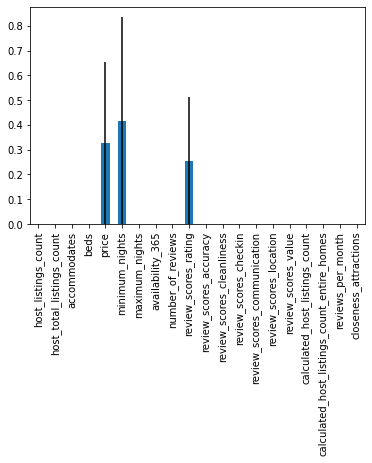

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gradient_importances.plot.bar(yerr=sum_imp, ax=ax)

In [34]:
listings.to_csv('success_listings.csv')